# Task
Apply K-Means and Hierarchical Clustering on sample datasets



## Upload file

### Subtask:
Create a cell for uploading the csv files.


**Reasoning**:
Create a code cell to handle the file upload process using google.colab.files.upload and print a message to the user.



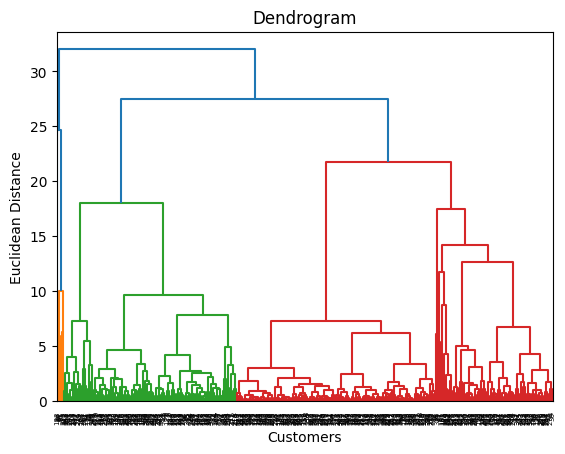

Silhouette Score: 0.2646091480214908


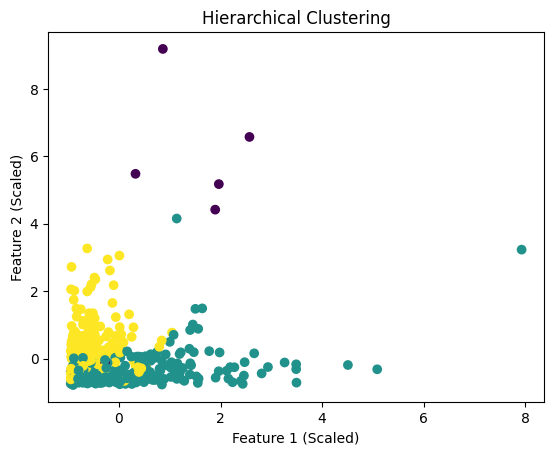

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# ----------------------------
# 1️⃣ Load Dataset
# ----------------------------
df = pd.read_csv("Wholesale customers data.csv")

# Remove categorical columns if present
if 'Channel' in df.columns:
    df = df.drop(['Channel', 'Region'], axis=1)

X = df.values

# ----------------------------
# 2️⃣ Feature Scaling
# ----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ----------------------------
# 3️⃣ Dendrogram
# ----------------------------
plt.figure()
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

# ----------------------------
# 4️⃣ Train Hierarchical Model
# ----------------------------
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = hc.fit_predict(X_scaled)

# ----------------------------
# 5️⃣ Silhouette Score
# ----------------------------
score = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", score)

# ----------------------------
# 6️⃣ Cluster Visualization (First 2 Features)
# ----------------------------
plt.figure()
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters)
plt.title("Hierarchical Clustering")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.show()